### Import Libraries

In [1]:
from models import ModelTrainer

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Common Variables

In [2]:
# path to data on aws
data_path = "/home/ubuntu/project/data/groundcover2016/"
model_path = "/home/ubuntu/project/model_checkpoints/unet/"
results_path = "/home/ubuntu/project/results/"
modelTrainer = ModelTrainer(data_path,results_path,model_path)
modelTrainer.changeMetrics(['acc',recall,precision,f1Score])

classMap = {
    'maize' : 1,
    'maizevariety': 1,
    'wheat': 2,
    'mungbean': 3
}

# Train Single Class Model

In [7]:
modelTrainer.changeEpochs(3)
modelTrainer.changeBatchSize(18)
modelTrainer.setWeightInitializer('he_normal')
modelTrainer.setOptimizerParams(lr = 1.0*(10**-3),momentum = 0.8,decay = 1.0*(10**-8))
modelTrainer.changeDropout(0.6)
modelTrainer.setClassName("maize")
modelTrainer.setSaveName("maize2")

15
2


In [4]:
modelTrainer.train()

AttributeError: 'NoneType' object has no attribute 'summary'

### Train Smaller Single Class Network

In [5]:
modelTrainer.changeBatchLogInterval(5)
modelTrainer.changeEpochs(5)
modelTrainer.changeDropout(0.6)
modelTrainer.setWeightInitializer('he_normal')
modelTrainer.changeConvolutionalDepth(4)
modelTrainer.changeBatchSize(256)
modelTrainer.setClassName("maize")
modelTrainer.setOptimizerParams(lr = 1.0*(10**-3),momentum = 0.9,decay = 1.0*(10**-6))
modelTrainer.setSaveName("smallNetwork2")


In [6]:
modelTrainer.train()

----------Model Parameters----------
Initial Conv. Depth : 4
Number of Classes   : 2
Dropout             : 0.6
Activation Function : Relu
Input Shape         : (256, 256, 3)
Batch Size          : 256
--------Optimizer Parameters--------
Learning Rate : <tf.Variable 'SGD_1/lr:0' shape=() dtype=float32_ref>
Momentum      : <tf.Variable 'SGD_1/momentum:0' shape=() dtype=float32_ref>
Initial Decay : 1e-06
Epoch 1/5
278/278 [==============================] - 1129s 4s/step - loss: 0.3179 - acc: 0.8480 - recall: 0.8480 - precision: 0.8480 - f1Score: 0.8480 - val_loss: 0.2137 - val_acc: 0.9181 - val_recall: 0.9181 - val_precision: 0.9181 - val_f1Score: 0.9181

Epoch 00001: saving model to /home/ubuntu/project/model_checkpoints/unet//smallNetwork2.hdf5
Epoch 2/5
278/278 [==============================] - 1126s 4s/step - loss: 0.1994 - acc: 0.9283 - recall: 0.9283 - precision: 0.9283 - f1Score: 0.9283 - val_loss: 0.1706 - val_acc: 0.9338 - val_recall: 0.9338 - val_precision: 0.9338 - val_f1Score

### Train an even smaller network

In [11]:
# variables
epochs = 2
batch_size = 256
steps_per_epoch = round(maize_train_size/batch_size)
validation_steps = round(maize_validate_size/batch_size)

# define parameters to build the model
modelParams = {
    'input_shape' : input_shape,
    'conv_depth' : 1,
    'init_w' : "he_normal",
    'lr' : 5.0*(10**-3),
    'weight_decay' : 1.0*(10**-5),
    'n_classes' : 2,
    'momentum' : 0.9,
    'dropout' : 0.6,
    'loss': 'categorical_crossentropy',
}
model = unet(modelParams)

trainGenerator, validateGenerator = getBatchGenerators(batch_size,data_path,shape,className = "maize")

# define callbacks 
model_checkpoint = ModelCheckpoint(model_path + 'unet/smallest_maize_model.hdf5', monitor='loss',verbose=1, save_best_only=True)
logger = WriteBatchResultsToCSV(model_path + "unet/smallest_singleclass_batch.csv",model_path + "unet/smallest_singleclass_epoch.csv",5)

/home/ubuntu/project/src/python/segmentation/models.py:123: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs,output = outputs)


In [12]:
# fit generators to the model
model.fit_generator(generator = trainGenerator,
                    validation_data = validateGenerator,
                    steps_per_epoch = steps_per_epoch,
                    validation_steps = validation_steps,
                    epochs = epochs,
                    use_multiprocessing = True,
                    callbacks =[model_checkpoint, logger])

Epoch 1/2
278/278 [==============================] - 525s 2s/step - loss: 0.4935 - acc: 0.8142 - val_loss: 0.4365 - val_acc: 0.8441

Epoch 00001: loss improved from inf to 0.49348, saving model to /home/ubuntu/project/model_checkpoints/unet/smallest_maize_model.hdf5
Epoch 2/2
278/278 [==============================] - 521s 2s/step - loss: 0.4701 - acc: 0.8209 - val_loss: 0.4337 - val_acc: 0.8444

Epoch 00002: loss improved from 0.49348 to 0.47012, saving model to /home/ubuntu/project/model_checkpoints/unet/smallest_maize_model.hdf5


# Train a multi-class model

In [3]:
modelTrainer.changeBatchLogInterval(5)
modelTrainer.changeEpochs(5)
modelTrainer.changeDropout(0.6)
modelTrainer.setWeightInitializer('he_normal')
modelTrainer.changeConvolutionalDepth(32)
modelTrainer.changeBatchSize(36)
modelTrainer.setClassMap(classMap)
modelTrainer.setOptimizerParams(lr = 1.0*(10**-4),momentum = 0.9,decay = 1.0*(10**-10))
modelTrainer.setSaveName("smallMulticlassNetwork")

In [4]:
modelTrainer.train()

----------Model Parameters----------
Initial Conv. Depth : 32
Number of Classes   : 4
Dropout             : 0.6
Activation Function : Relu
Input Shape         : (256, 256, 3)
Batch Size          : 36
--------Optimizer Parameters--------
Learning Rate : <tf.Variable 'SGD/lr:0' shape=() dtype=float32_ref>
Momentum      : <tf.Variable 'SGD/momentum:0' shape=() dtype=float32_ref>
Initial Decay : 1e-10
Epoch 1/5
9115/9115 [==============================] - 17138s 2s/step - loss: 0.4427 - acc: 0.8257 - recall: 0.7537 - precision: 0.9072 - f1Score: 0.8223 - val_loss: 0.3977 - val_acc: 0.8428 - val_recall: 0.7899 - val_precision: 0.9001 - val_f1Score: 0.8413

Epoch 00001: saving model to /home/ubuntu/project/model_checkpoints/unet//smallMulticlassNetwork.hdf5
Epoch 2/5
 232/9115 [..............................] - ETA: 4:12:07 - loss: 0.3986 - acc: 0.8435 - recall: 0.7889 - precision: 0.8998 - f1Score: 0.8406

KeyboardInterrupt: 

### Train multi-class model for another epoch

In [3]:
modelTrainer.changeBatchLogInterval(5)
modelTrainer.changeEpochs(1)
modelTrainer.changeDropout(0.6)
modelTrainer.setWeightInitializer('he_normal')
modelTrainer.changeBatchSize(36)
modelTrainer.setClassMap(classMap)
modelTrainer.setOptimizerParams(lr = 1.0*(10**-8),momentum = 0,decay =0)
modelTrainer.setSaveName("smallMulticlassNetworkEpoch2")

In [4]:
modelTrainer.trainMore(model_path + "/smallMulticlassNetwork.hdf5")

----------Model Parameters----------
Initial Conv. Depth : 32
Number of Classes   : 4
Dropout             : 0.6
Activation Function : Relu
Input Shape         : (256, 256, 3)
Batch Size          : 36
--------Optimizer Parameters--------
Learning Rate : <tf.Variable 'SGD/lr:0' shape=() dtype=float32_ref>
Momentum      : <tf.Variable 'SGD/momentum:0' shape=() dtype=float32_ref>
Initial Decay : 0
Epoch 1/1
9115/9115 [==============================] - 16374s 2s/step - loss: 0.3918 - acc: 0.8460 - recall: 0.7930 - precision: 0.9011 - f1Score: 0.8435 - val_loss: 0.3987 - val_acc: 0.8423 - val_recall: 0.7895 - val_precision: 0.8998 - val_f1Score: 0.8409

Epoch 00001: saving model to /home/ubuntu/project/model_checkpoints/unet//smallMulticlassNetworkEpoch2.hdf5


In [ ]:
### Train Large Multi-class Network

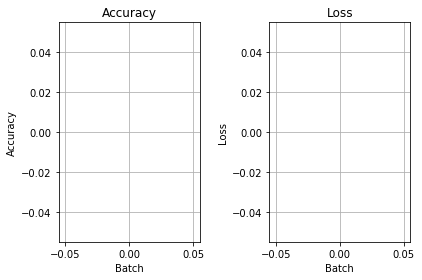

In [12]:
classMap = {
    'maize' : 1,
    'maizevariety': 1,
    'wheat': 2,
    'mungbean': 3
}

modelTrainer.changeBatchLogInterval(5)
modelTrainer.changeEpochs(1)
modelTrainer.changeDropout(0.6)
modelTrainer.setWeightInitializer('he_normal')
modelTrainer.changeConvolutionalDepth(64)
modelTrainer.changeBatchSize(36)
modelTrainer.setClassMap(classMap)
modelTrainer.setOptimizerParams(lr = 1.0*(10**-4),momentum = 0.9,decay = 1.0*(10**-10))
modelTrainer.setSaveName("multiclassNetwork")

### Train a Smaller multiclass model